In [1]:
path = r'G:\My Drive\Darkmatter\Measurements'
path_to_plots=r'G:\Shared drives\LAB\מעבדה ב2\ניסויים\חומר אפל\plots'
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import math
from IPython.display import HTML
dir_list = os.listdir()
os.chdir(path)

# פונקציות עזר למיצוע גרף ומציאת נקודה קרובה ביותר למטרה

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def AVG(lst,n):
    lst=list(lst)
    new_lst=[]
    for i in range(n,len(lst)-n):
        new_lst.append(np.average(lst[i-n:i+n]))
    return np.array(new_lst)

# חילוץ נתונים

In [3]:
def read_data_from_one(n):
    df = pd.read_csv('{}_{}.csv'.format(n,0))
    column_VELO = np.array(df.iloc[:, 0])
    column_TEMP = np.array(df.iloc[:, 1])
    column_TEMP =np.where((column_TEMP<25),0,column_TEMP)
    #column_VELO =np.where((column_TEMP<25),0,column_VELO)
    return column_VELO,column_TEMP


def read_data_from_four(n):
    df = pd.read_csv('-{}_{}.csv'.format(n,0)) 
    column_VELO = np.array(df.iloc[:, 0])
    column_TEMP = np.array(df.iloc[:, 1])
    column_TEMP =np.where((column_TEMP<25),0,column_TEMP)
    return column_VELO,column_TEMP

# מציאת קיצון מסוג מקסימום על פי כיוון החיפוש

In [4]:
def find_pi_RIGHT(df):
    temp = df[1]
    Velo = df[0]
    picks=sp.signal.find_peaks(temp, height=None,
                        threshold=None,
                        distance=None,
                        prominence=None,
                        width=None,
                        wlen=None,
                        rel_height=0.5,
                        plateau_size=None)
    return Velo[picks[0][-1]]
      
    
def find_pi_Left(df):
    temp = df[1]
    Velo = df[0]
    picks=sp.signal.find_peaks(temp, height=None,
                        threshold=None,
                        distance=None,
                        prominence=None,
                        width=None,
                        wlen=None,
                        rel_height=0.5,
                        plateau_size=None)
    return Velo[picks[0][0]]

# הארון ששמים בתוכו את הבלאגן

In [5]:
radiusplus = []
velocityplus = []
radiusmin = []
velocitymin = []



results_tuples_plus = []
results_tuples_plus_err = []
results_tuples_minus = []
results_tuples_minus_err = []



results_tuples_plus = []
results_tuples_minus = []

R_errmax=[]   
V_errmax=[]


R_errmin=[]   
V_errmin=[]


results_tuples_mean_err = []



error_R=[]
error_V=[]


dict_resu_90={}
dict_resu_180={}

# לופ לחישוב המהירות אחרי העיבוד לרדיאלית, כנ''ל לרדיוס חישוב שגיאה

In [6]:
for i in range(1,91):
     
    df=(read_data_from_one(i))
    velo_max = find_pi_RIGHT(df)
    R = 8*np.sin(np.radians(i))
    veloc = velo_max + 220 * np.sin(np.radians(i))
    velocityplus.append(veloc)
    radiusplus.append(R)
    
    
    
    
    
    results_tuples_plus.append((R,veloc))
    
    inx_max_plus = tuple(np.argwhere(df[0]==velo_max))[0]
    nvelo_plus = df[0][inx_max_plus[0]:]
    ntemp_plus = df[1][inx_max_plus[0]:]
    HW_temp_plus = find_nearest(ntemp_plus, ntemp_plus[0]/2)
    HW_inx_plus = tuple(np.argwhere(ntemp_plus == HW_temp_plus))[0]
    HW_velo_plus = nvelo_plus[HW_inx_plus]
    
    

    R_err_plus = 8*np.pi*np.cos(np.radians(i))/(180*math.sqrt(12))
    velo_err_plus = math.sqrt((abs(nvelo_plus[0]-HW_velo_plus)/math.sqrt(2*np.log(2)))**2 +
                              (220*np.pi*np.cos(np.radians(i)))**2/(180**2*12))

    
    
    
    results_tuples_plus_err.append((R_err_plus, velo_err_plus))
    
    R_errmax.append(R_err_plus)  
    V_errmax.append(velo_err_plus)
    

In [7]:
for i in range(1,91):
    
    
    df=(read_data_from_four(i))
    velo_max = find_pi_Left(df)
    R = 8*np.sin(np.radians(-i))
    veloc = velo_max + 220 * np.sin(np.radians(-i))
    
    velocitymin.append(veloc)
    radiusmin.append(R)
    
    
    results_tuples_minus.append((-R,-veloc))
    
    

    inx_max_min = tuple(np.argwhere(df[0]==velo_max))[0]
    nvelo_min = df[0][:inx_max_min[0]]
    ntemp_min = df[1][:inx_max_min[0]]
    HW_temp_min = find_nearest(ntemp_min, ntemp_min[len(ntemp_min)-1]/2)
    HW_inx_min = tuple(np.argwhere(ntemp_min == HW_temp_min))[0]
    HW_velo_min = nvelo_min[HW_inx_min]


    R_err_min = 8*np.pi*np.cos(np.radians(i))/(180*math.sqrt(12))
    velo_err_min = math.sqrt((abs(nvelo_min[len(ntemp_min)-1]-HW_velo_min)/math.sqrt(2*np.log(2)))**2 +
                             (220*np.pi*np.cos(np.radians(-i)))**2/(180**2*12))
    results_tuples_minus_err.append((R_err_min, velo_err_min))


    R_errmin.append(R_err_min)  
    V_errmin.append(velo_err_min)
V_errmin[66]=V_errmin[65] 


# חישובים דומים עבור הממוצע
שיקוף הפונקציה השלילית
היפוך נתונים כשצריך
טיפול בנק' בעייתית

In [8]:
for i in range(0,90):
    
    R_err_mean = 0.5*math.sqrt(results_tuples_plus_err[i][0]**2 + 
                               results_tuples_minus_err[89-i][0]**2)
    
    velo_err_mean = 0.5 * math.sqrt(results_tuples_plus_err[i][1]**2 + 
                                    results_tuples_minus_err[89-i][1]**2)
    
    results_tuples_mean_err.append((R_err_mean, velo_err_mean)) 
    
    error_R.append(R_err_mean)
    error_V.append(velo_err_mean)
    
error_V[23]=error_V[24]

radiusmin = np.array(radiusmin)
radiusplus = np.array(radiusplus)
velocitymin = np.array(velocitymin)
velocityplus = np.array(velocityplus)


radiusmin_2 = -1*radiusmin
velocitymin_2 = -1*velocitymin

velo_err_2 = np.flip(V_errmin)
R_err_2 = np.flip(R_errmin)

# חישוב ממוצע

In [9]:
for i in range(len(radiusplus)):
    velocity_mean = np.sum([velocitymin_2,velocityplus],axis=0)/2

# היפוך ואיחוד לכמה נתונים מעובדים ושגיאותם

In [10]:
Radius = np.concatenate((np.flip(np.array(radiusmin)),np.array(radiusplus)))
velocity = np.concatenate((np.flip(np.array(velocitymin)),np.array(velocityplus)))
error_all_R = np.concatenate((np.flip(np.array(R_errmin)),np.array(R_errmax)))
error_all_V = np.concatenate((np.flip(np.array(V_errmin)),np.array(V_errmax)))

# סיכום של כל התוצאות

In [67]:
list_of_col_for_results_90 = ['0-90 data_R',      '0-90 data_V',     '-90-0 data_R',
                              '-90-0 data_V',     'flip -90-0 R' ,   'flip -90-0 V', 
                              'MEAN DATA',        '0-90 R err',      '-90-0 R err',  
                              'flip R err',       'Mean_err_R',      '0-90 Velo err',  
                              '-90-0 Velo err',   'flip Velo err',   'MEAN_ERR_V']



list_of_results_90 = [radiusplus,      velocityplus,     radiusmin,
                      velocitymin,     radiusmin_2,      velocitymin_2,   
                      velocity_mean,   R_errmax,         R_errmin,   
                      R_err_2,         error_R,          V_errmax,     
                      V_errmin,        velo_err_2,       error_V]



list_of_col_for_results_180 = [ 'all_range_data_R',
                               'all_range_data_V',
                                'all data err R',
                              'all data err V' ]

list_of_results_180 = [Radius,
                       velocity,
                       error_all_R,
                       error_all_V]



for i in range(len(list_of_results_90)):
    dict_resu_90[list_of_col_for_results_90[i]] = list_of_results_90[i] 
    
for i in range(len(list_of_results_180)):
    dict_resu_180[list_of_col_for_results_180[i]] = list_of_results_180[i] 

    
DF90 = pd.DataFrame(dict_resu_90)    
DF180 = pd.DataFrame(dict_resu_180)

# כל הקוביות לפלט הגרפים

In [12]:
fig_size = (12,8)

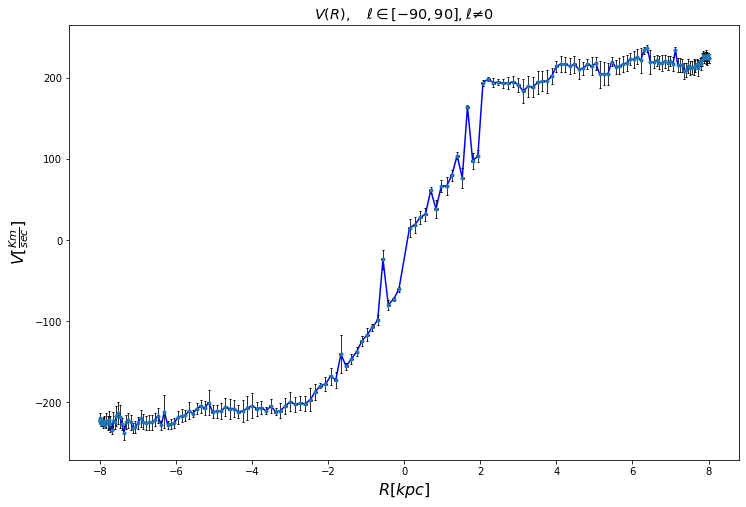

In [13]:
#################plot all with error bar


fig, ax1 = plt.subplots(figsize=fig_size)
plt.style.use('ggplot')


ax1.plot(DF180['all_range_data_R'],DF180['all_range_data_V'],color='b')
ax1.errorbar(DF180['all_range_data_R'],
             DF180['all_range_data_V'],
             yerr=DF180['all data err V'],
             xerr=DF180['all data err R'],
             fmt='.',
              ecolor='black', elinewidth=0.8, capsize=1.2,
              barsabove=False, lolims=False, uplims=False,
              xlolims=False, xuplims=False, errorevery=1,
              capthick=None,data=None)

ax1.set(title=r'$V(R),\quad\ell\in[-90,90],\ell\ne 0$')
ax1.set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
ax1.set_xlabel(r'$R[kpc]$',fontsize='16')

plt.savefig(path_to_plots+'\All_data.png')

Text(0.5, 0, '$R[kpc]$')

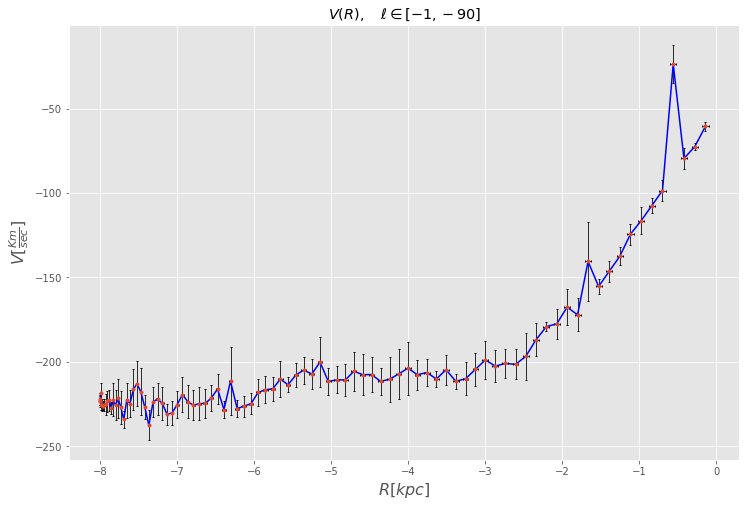

In [15]:
###############plot only negative with error bar


fig, ax1 = plt.subplots(figsize=fig_size)
plt.style.use('ggplot')

ax1.plot(DF90['-90-0 data_R'],DF90['-90-0 data_V'],color='b')
ax1.errorbar(DF90['-90-0 data_R'],DF90['-90-0 data_V'],
             yerr=DF90['-90-0 Velo err'], xerr=DF90['-90-0 R err'], fmt='.',
              ecolor='black', elinewidth=0.8, capsize=1.2,
              barsabove=False, lolims=False, uplims=False,
              xlolims=False, xuplims=False, errorevery=1,
              capthick=None,data=None)



ax1.set(title=r'$V(R),\quad\ell\in[-1,-90]$')
ax1.set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
ax1.set_xlabel(r'$R[kpc]$',fontsize='16')
#ax1.legend(loc='upper left')
#plt.savefig(path_to_plots+'\Neg_only.png')

Text(0.5, 0, '$R[kpc]$')

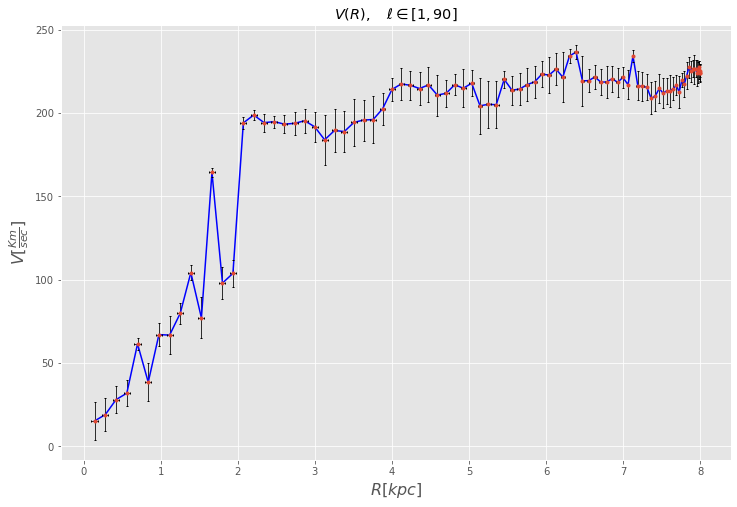

In [16]:
##################plot only positive with error bar



fig, ax1 = plt.subplots(figsize=fig_size)
plt.style.use('ggplot')

ax1.plot(DF90['0-90 data_R'],DF90['0-90 data_V'],color='b')
ax1.errorbar(DF90['0-90 data_R'],DF90['0-90 data_V'],
             yerr=DF90['0-90 Velo err'], xerr=DF90['0-90 R err'], fmt='.',
              ecolor='black', elinewidth=0.8, capsize=1.2,
              barsabove=False, lolims=False, uplims=False,
              xlolims=False, xuplims=False, errorevery=1,
              capthick=None,data=None)


ax1.set(title=r'$V(R),\quad\ell\in[1,90]$')
ax1.set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
ax1.set_xlabel(r'$R[kpc]$',fontsize='16')
#plt.savefig(path_to_plots+'\pos_only.png')

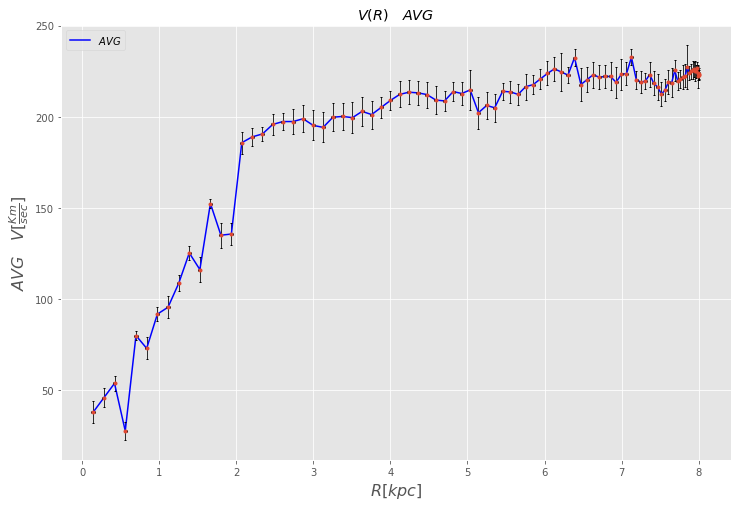

In [17]:
##################plot only mean with error bar

fig, ax1 = plt.subplots(figsize=fig_size)
plt.style.use('ggplot')


ax1.plot(radiusplus,DF90['MEAN DATA'],color='b',label=r'$AVG$')
ax1.errorbar( radiusplus,DF90['MEAN DATA'], yerr=DF90['MEAN_ERR_V'], xerr=DF90['Mean_err_R'], fmt='.',
              ecolor='black', elinewidth=0.8, capsize=1.2,
              barsabove=False, lolims=False, uplims=False,
              xlolims=False, xuplims=False, errorevery=1,
              capthick=None,data=None)


ax1.set(title=r'$V(R)\quadAVG$')
ax1.set_ylabel(r'$AVG\quadV[\frac{Km}{sec}]$',fontsize='16')
ax1.set_xlabel(r'$R[kpc]$',fontsize='16')
ax1.legend(loc='upper left')
#plt.savefig(path_to_plots+'\AVG_only.png')

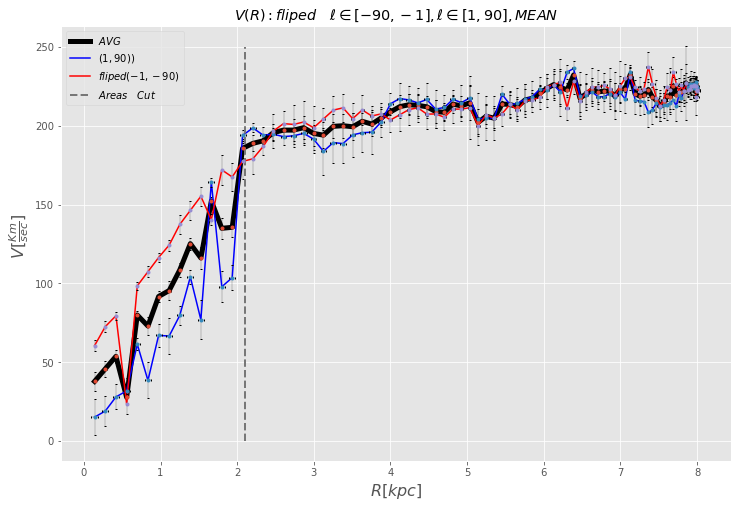

In [18]:

fig, ax1 = plt.subplots(figsize=fig_size)
plt.style.use('ggplot')




ax1.plot(radiusplus,DF90['MEAN DATA'],color='black',label=r'$AVG$',linewidth=5.0)
ax1.errorbar( radiusplus,DF90['MEAN DATA'], yerr=DF90['MEAN_ERR_V'], xerr=DF90['Mean_err_R'], fmt='.',
              ecolor='black', elinewidth=0.2, capsize=1.2,
              barsabove=False, lolims=False, uplims=False,
              xlolims=False, xuplims=False, errorevery=1,
              capthick=None,data=None)



ax1.plot(DF90['0-90 data_R'],DF90['0-90 data_V'],color='b',label=r'$(1,90))$')
ax1.errorbar(DF90['0-90 data_R'],DF90['0-90 data_V'],
             yerr=DF90['0-90 Velo err'], xerr=DF90['0-90 R err'], fmt='.',
              ecolor='black', elinewidth=0.2, capsize=1.2,
              barsabove=False, lolims=False, uplims=False,
              xlolims=False, xuplims=False, errorevery=1,
              capthick=None,data=None)



ax1.plot(DF90['flip -90-0 R'],DF90['flip -90-0 V'],color='r',label=r'$fliped(-1,-90)$')
ax1.errorbar(DF90['flip -90-0 R'],DF90['flip -90-0 V'],
             yerr=DF90['flip Velo err'], xerr=DF90['flip R err'], fmt='.',
              ecolor='black', elinewidth=0.2, capsize=1.2,
              barsabove=False, lolims=False, uplims=False,
              xlolims=False, xuplims=False, errorevery=1,
              capthick=None,data=None)


plt.plot([2.1, 2.1], [0, 250], '--', lw=2, label=r'$Areas\quadCut$')

ax1.set(title=r'$V(R):fliped\quad\ell\in[-90,-1],\ell\in[1,90],MEAN$')
ax1.set_ylabel(r'$\quadV[\frac{Km}{sec}]$',fontsize='16')
ax1.set_xlabel(r'$R[kpc]$',fontsize='16')


ax1.legend(loc='upper left')

#plt.savefig(path_to_plots+'\AVG_FLIPED_CUT_1-90.png')

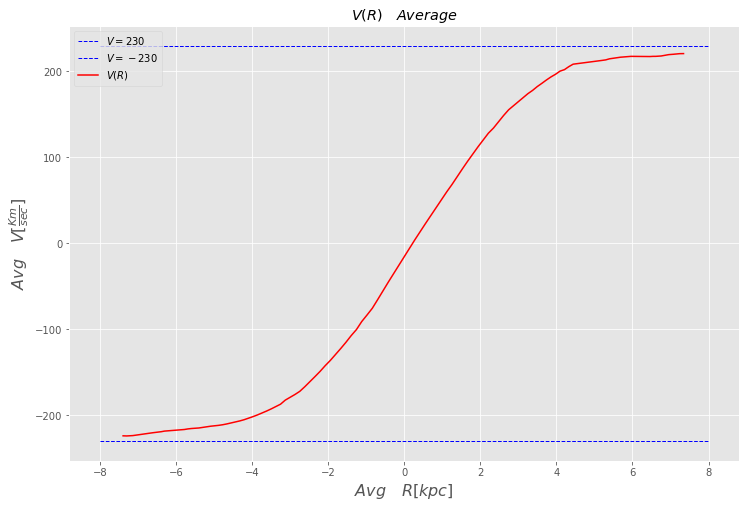

In [19]:
####################Avg example

fig, ax1 = plt.subplots(figsize=fig_size)
plt.style.use('ggplot')


plt.plot([-8, 8], [230, 230], '--', lw=1,color='b' ,label=r'$V=230$')
plt.plot([-8, 8], [-230, -230], '--', lw=1,color='b' ,label=r'$V=-230$')
ax1.set(title=r'$V(R)\quadAverage$')
ax1.plot(AVG(DF180['all_range_data_R'],20),AVG(DF180['all_range_data_V'],20),color='r',label=r'$V(R)$')
ax1.set_ylabel(r'$Avg\quadV[\frac{Km}{sec}]$',fontsize='16')
ax1.set_xlabel(r'$Avg\quadR[kpc]$',fontsize='16')
ax1.legend(loc='upper left')
#plt.savefig(path_to_plots+'\Averaging_data.png')

In [20]:
#########################saving - be cearfull to not save in the same name as another good plot

# plt.savefig('G:\Shared drives\LAB\מעבדה ב2\ניסויים\חומר אפל\Errorbar2.png')

In [21]:
index_to_cut=None
for i in range(len(radiusplus)):
    if radiusplus[i]<2.1 and radiusplus[i+1]>2.1:
        index_to_cut = i
# list_of_col_for_results_90 = ['0-90 data_R',      '0-90 data_V',     '-90-0 data_R',
#                               '-90-0 data_V',     'flip -90-0 R' ,   'flip -90-0 V', 
#                               'MEAN DATA',        '0-90 R err',      '-90-0 R err',  
#                               'flip R err',       'Mean_err_R',      '0-90 Velo err',  
#                               '-90-0 Velo err',   'flip Velo err',   'MEAN_ERR_V']

velocityplus_SR= DF90['MEAN DATA'][:index_to_cut+1]
velocityplus_BR = DF90['MEAN DATA'][index_to_cut:]

radiusplus_SR=DF90['0-90 data_R'][:index_to_cut+1]
radiusplus_BR=DF90['0-90 data_R'][index_to_cut:]

SR_R_error = DF90['Mean_err_R'][:index_to_cut+1]
BR_R_error = DF90['Mean_err_R'][index_to_cut:]

SR_V_error = DF90['MEAN_ERR_V'][:index_to_cut+1]
BR_V_error = DF90['MEAN_ERR_V'][index_to_cut:]




Text(0.5, 0, '$R[kpc]$')

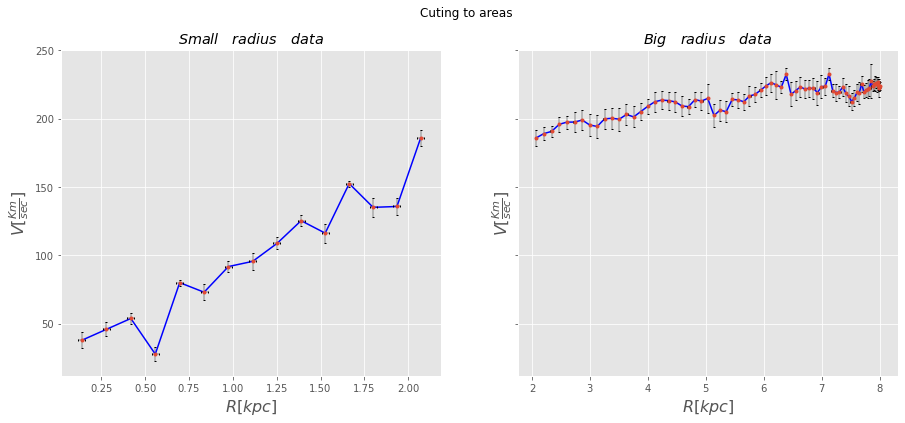

In [22]:
#cut plot


fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
plt.style.use('ggplot')



axs[0].plot(radiusplus_SR, velocityplus_SR ,color='b')

axs[1].plot(radiusplus_BR, velocityplus_BR ,color='b')

axs[0].errorbar(radiusplus_SR, velocityplus_SR,
             yerr=SR_V_error, xerr=SR_R_error, fmt='.',
              ecolor='black', elinewidth=0.4, capsize=1.2,
              barsabove=False, lolims=False, uplims=False,
              xlolims=False, xuplims=False, errorevery=1,
              capthick=None,data=None)

axs[1].errorbar(radiusplus_BR, velocityplus_BR,
             yerr=BR_V_error, xerr=BR_R_error, fmt='.',
              ecolor='black', elinewidth=0.4, capsize=1.2,
              barsabove=False, lolims=False, uplims=False,
              xlolims=False, xuplims=False, errorevery=1,
              capthick=None,data=None)

axs[0].set_title(r'$Small \quad radius \quad data$')
axs[1].set_title(r'$Big \quad radius \quad data$')


#axs[0].title('Small R linear')
fig.suptitle('Cuting to areas')


axs[0].set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
axs[0].set_xlabel(r'$R[kpc]$',fontsize='16')


axs[1].set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
axs[1].set_xlabel(r'$R[kpc]$',fontsize='16')




#plt.savefig(path_to_plots+'\CUT_data_error.png')

# חלק 2

## התאמה לינארית

In [78]:
y=np.array(DF90['MEAN DATA'])
y_error=np.array(DF90['MEAN_ERR_V'])
x=np.array(DF90['0-90 data_R'])
x_error=np.array(DF90['Mean_err_R'])
#print(y,y_error,x,x_error)
resdictfirst = {'x':x[0:9],'x_error':x_error[0:9],'y':y[0:9],'y_error':y_error[0:9]}
resdictsec = {'x':x[34:],'x_error':x_error[34:],'y':y[34:],'y_error':y_error[34:]}

In [82]:
DFfa = pd.DataFrame(resdictfirst)
DFsa = pd.DataFrame(resdictsec)

In [83]:
DFfa.to_csv('first_a_L.csv',index=False)
DFsa.to_csv('second_a_L.csv',index=False)

In [124]:
from eddington import FittingData, fit

from eddington import linear 

def Linear_mul_cvs(lst_of_cvs):
    for i in lst_of_cvs:
        file_to_fit=str(i)
        data = FittingData.read_from_csv(file_to_fit)  # Read the data from a file
    
        result = str(fit(data, linear))# Fit the data
        #print("results to file: {}".format(file_to_fit),'\n')
        #print(result)
        a0=result.split()[10:24]
        a1=result.split()[17:24]
        #print(result)
        print ('const: ',a0[0],a0[1],a0[2],a0[3],a0[4],a0[5],a0[6])
        print ('slope: ',a1[0],a1[1],a1[2],a1[3],a1[4],a1[5],a1[6])
        
        return float(a0[2]),float(a0[4]),float(a1[2]),float(a1[4])
a0f,a0f_err,a1f,a1f_err=Linear_mul_cvs(['first_a_L.csv'])
a0s,a0s_err,a1s,a1s_err=Linear_mul_cvs(['second_a_L.csv'])


const:  a[0] = 22.66 ± 10.81 (47.69% error)
slope:  a[1] = 69.80 ± 13.70 (19.63% error)
const:  a[0] = 196.618 ± 4.210 (2.141% error)
slope:  a[1] = 3.4807 ± 0.5858 (16.83% error)


In [119]:
def liner_by_param(x_data,slope,const):
    func=const+slope*x_data
    return func

In [120]:
firstarealin=liner_by_param(x,a1f,a0f)
secondarealin=liner_by_param(x,a1s,a0s)

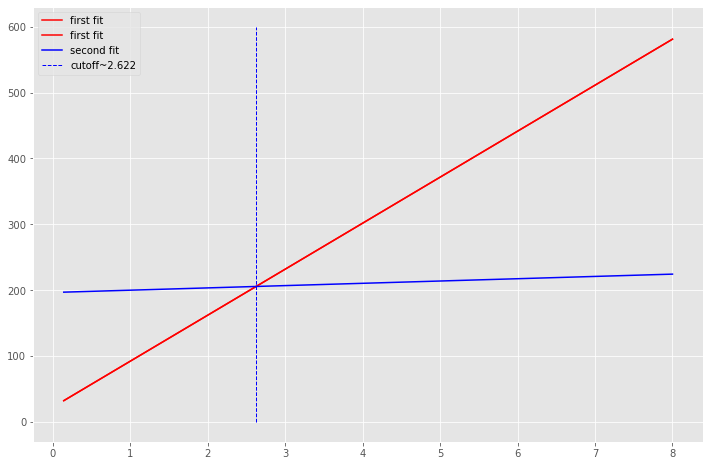

In [128]:
fig, ax1 = plt.subplots(figsize=fig_size)
plt.style.use('ggplot')

#ax1.set(title=r'$V(R)\quadAverage$')
ax1.plot(x,firstarealin,color='r',label=r'first fit')
ax1.plot(x,firstarealin,color='r',label=r'first fit')

ax1.plot(x,secondarealin,color='b',label=r'second fit')
plt.plot([2.622, 2.622], [0,600], '--', lw=1, color='b' ,label=r'cutoff~2.622')
#ax1.set_ylabel(r'$Avg\quadV[\frac{Km}{sec}]$',fontsize='16')
#ax1.set_xlabel(r'$Avg\quadR[kpc]$',fontsize='16')
ax1.legend(loc='upper left')


plt.savefig(path_to_plots+'\Rfind.png')